In [1]:
import pandas as pd
import datetime as dt
import numpy as np
import time
import calendar
import urllib
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import collections
import sklearn
import sklearn.ensemble as ens
from sklearn import preprocessing, metrics, cluster
from scipy import stats
from matplotlib.dates import DateFormatter
from pandas.plotting import register_matplotlib_converters

sns.set()
colours = sns.color_palette("husl", 8)
cs = [colours[i] for i in range(len(colours))]
sns.set_palette(sns.color_palette(colours))
register_matplotlib_converters()

### Load MAPE and RMSE scores from historical and regression models.

In [5]:
%store -r historical_mapes
%store -r historical_rmses
%store -r regression_mapes
%store -r regression_rmses

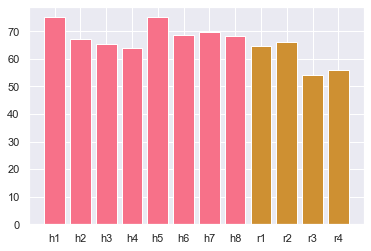

In [8]:
fig, ax = plt.subplots()
ax.bar(["h1", "h2", "h3", "h4", "h5", "h6", "h7", "h8"], historical_mapes)
ax.bar(["r1","r2","r3","r4"], regression_mapes)
plt.show()

In [3]:
compare_labels = ["2 buses", "5 buses", "10 buses", "15 buses", "15 min", "30 min", "1 hour", "2 hours"]
["ToD", "DoW", "ToD + DoW", "ToD + DoW + Lockdown"]

rmses_compare = rmses_52b + rmses_52m
mapes_compare = mapes_52b + mapes_52m
colour_map = [cs[6], cs[6], cs[6], cs[6], cs[5], cs[5], cs[5], cs[5]]

fig, ax = plt.subplots(figsize=(12,10), nrows = 2, ncols = 1)

# different colours for buses back bersus time back
ax[0].bar(compare_labels, rmses_compare, color=colour_map)
ax[0].set_title("RMSE score for different models")
ax[0].set_xlabel("Model")
ax[0].set_ylabel("RMSE (seconds)")

rects_rmse = ax[0].patches
labels_rmse = labels_rmseb + labels_rmsem

for rect, label in zip(rects_rmse, labels_rmse):
    height = rect.get_height()
    ax[0].text(rect.get_x() + rect.get_width() / 2, height - 5, label,
            ha='center', va='bottom')
    
ax[1].bar(compare_labels, mapes_compare, color=colour_map)
ax[1].set_title("MAPE score for different models")
ax[1].set_xlabel("Model")
ax[1].set_ylabel("MAPE (seconds)")

rects_mape = ax[1].patches
labels_mape = labels_mapeb + labels_mapem

for rect, label in zip(rects_mape, labels_mape):
    height = rect.get_height()
    ax[1].text(rect.get_x() + rect.get_width() / 2, height - 5, label,
            ha='center', va='bottom')

plt.show()

[75.0662631325301, 67.186132284239, 65.51398141395775, 63.91526907367172, 74.98378216216214, 68.52959869295638, 69.86692965384168, 68.1041071715566]
